### 1d_1.ipynb
#### Examples of 1D range expansions.
---
First, include RESK:

In [1]:
include("../resk.jl")

RESK successfully loaded.


Let's run a small simulation of a range expansion assuming the finite-sites model of individuals. This model is quite realistic in that it simulates every locus of every individual, every generation.

All `rangeexp` methods will generate a habitat (that allows for individual structure above) and seed it with individuals automatically, after which the burn-in and expansion phases begin. By default, individuals are seeded on one side of the habitat (and the population will expand to the other side).

You can always reference the method descriptions to find out more about them. (Note that VSCode's Intellisense doesn't include the "description on hover" functionality in `.ipynb` yet -- it does in `.jl`)

So, let's run a small simulation of 10+10 generations (burn-in and proper expansion respectively):

In [2]:
test = rangeexp_1d(10,10;data_to_generate="FPSN")

Dict{String, Any} with 9 entries:
  "AAsel" => Float32[0.0 0.0 … 1.05556 0.4; 0.0 0.0 … 1.08333 1.38889; … ; NaN …
  "pops"  => Float32[25.0 21.0 … 15.0 18.0; 25.0 24.0 … 17.0 11.0; … ; NaN NaN …
  "aasel" => Float32[500.0 499.6 … 492.444 492.933; 500.0 499.68 … 491.75 491.7…
  "fitn"  => Float32[1.0 1.0 … 0.997893 0.999201; 1.0 1.0 … 0.997838 0.997228; …
  "aaneu" => Float32[500.0 499.32 … 493.556 492.733; 500.0 499.64 … 495.792 495…
  "Aasel" => Float32[0.0 0.4 … 6.5 6.66667; 0.0 0.32 … 7.16667 6.83333; … ; NaN…
  "Aaneu" => Float32[0.0 0.68 … 5.94444 6.86667; 0.0 0.36 … 3.83333 4.66667; … …
  "AAneu" => Float32[0.0 0.0 … 0.5 0.4; 0.0 0.0 … 0.375 0.111111; … ; NaN NaN ……
  "stats" => Dict{String, Any}("capacity"=>20, "wlddim"=>1, "max_burnin"=>(5,),…

The output is a dictionary with multiple data arrays.

For the sake of economising resources, you have to specify which data are returned in `data_to_generate`. We have just generated all possible data (**F** for `fitn`, **P** for `pops`, **S** for selected mutations, and **N** for neutral mutations).

A statistics array is also always returned:

In [3]:
test["stats"]

Dict{String, Any} with 21 entries:
  "capacity"          => 20
  "wlddim"            => 1
  "max_burnin"        => (5,)
  "name"              => "2024-08-22_08-13-22"
  "startfill"         => UnitRange{Int64}[1:5]
  "domin_coef"        => 0
  "n_gens_burnin"     => 10
  "prop_of_del_muts"  => 0.9
  "migr_rate"         => 0.1
  "sel_loci"          => [868, 368, 572, 349, 718, 624, 565, 695, 327, 184  …  …
  "max"               => (100,)
  "prolif_rate"       => 1.8
  "sel_coef"          => 0.002
  "n_gens"            => 20
  "migr_mode"         => "ort"
  "n_gens_exp"        => 10
  "mut_rate"          => 0.7567
  "n_loci"            => 1000
  "max_exp"           => (100,)
  ⋮                   => ⋮

This shows different statistics about the habitat as well as the range expansion.

Now, let's return to look at some data that we got.

`reskplots.jl` has a selection of unique plotting functions that start with `re_plot_` or `re_heatmap_`. These aid in viewing the data returned in `rangeexp_` functions.

Let's create an animation of the distribution of deme populations (`pops`) in time:

RESKPlots successfully loaded.


┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_nURMvc3wfM.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_nURMvc3wfM.gif")
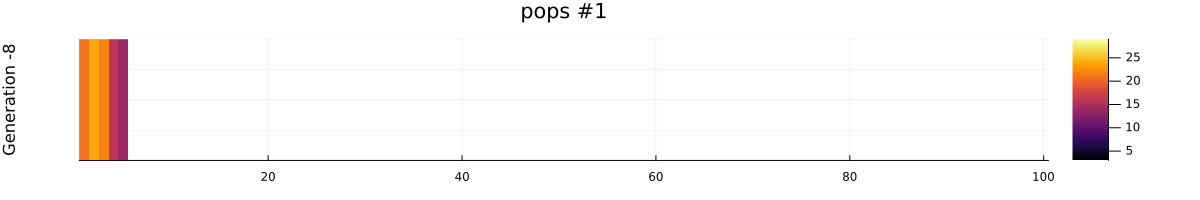

In [4]:
include("../reskplots.jl")
re_heatmap(test,"pops")

We see a one-dimensional animation spanning generations from -10 to 10: the burn-in generations are negative by default. As we can notice, the population starts to go right a little bit towards the end.

Let's confirm that with a longer expansion. And let's also make multiple replicates this time by including the number of replicates as the third argument (1 is default). Replicates are automatically parallel-computed:

In [5]:
test2 = rangeexp_1d(10,40,4;data_to_generate="FPSN")

Dict{String, Any} with 9 entries:
  "AAsel" => Float32[0.0 0.0 … 3.85714 3.7; 0.0 0.0 … 3.63636 1.46667; … ; NaN …
  "pops"  => Float32[36.0 21.0 … 19.0 25.0; 33.0 23.0 … 15.0 11.0; … ; NaN NaN …
  "aasel" => Float32[500.0 499.579 … 482.667 481.3; 500.0 499.586 … 484.0 481.9…
  "fitn"  => Float32[1.0 1.0 … 0.992332 0.992644; 1.0 1.0 … 0.992758 0.997075; …
  "aaneu" => Float32[500.0 499.605 … 486.333 485.0; 500.0 499.897 … 486.545 484…
  "Aasel" => Float32[0.0 0.421053 … 13.4762 15.0; 0.0 0.413793 … 12.3636 16.6; …
  "Aaneu" => Float32[0.0 0.394737 … 11.4762 12.5; 0.0 0.103448 … 9.63636 14.2; …
  "AAneu" => Float32[0.0 0.0 … 2.19048 2.5; 0.0 0.0 … 3.81818 1.66667; … ; NaN …
  "stats" => Dict{String, Any}("capacity"=>20, "wlddim"=>1, "max_burnin"=>(5,),…

The title of the plot above ("pops #1") refers to the iterate #1 (out of 1) that we generated. Now that we have 4 iterates, let's see the `pops` for the 4th one:

┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_xsTgPI52pI.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_xsTgPI52pI.gif")
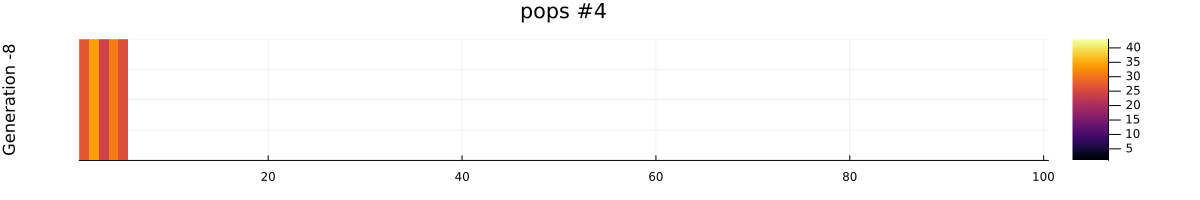

In [6]:
re_heatmap(test2,"pops";re_index=4)

Note that the maximum value has changed (the plots automatically scale).

RESK also includes special plotting methods (*re_heatmap_%%%*, where %%% is the data) that thake into account the specifics of the plotted data type.

For example, the following shows the same population distribution as above, but limits the colour maximum to the deme capacity:

In [7]:
re_heatmap_pops(test2;re_index=4)

KeyError: KeyError: key "k_capacity" not found

Let's plot the evolution of deme-average fitness in time:

┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_VyLyvwB678.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_VyLyvwB678.gif")
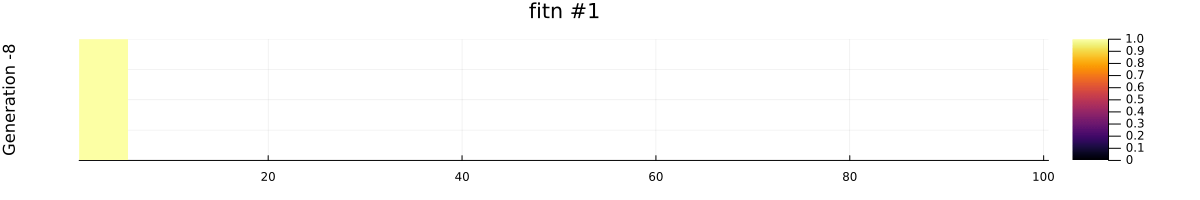

In [8]:
re_heatmap_fitn(test2)

For a simpler calculation, it is sometimes viable to simulate a range expansion using the infinite sites model. Simply use the suffix *_inf* for infinite-sites simulations:

In [9]:
test3 = rangeexp_1d_inf(10,40,4;data_to_generate="FPM")

Dict{String, Any} with 5 entries:
  "pops"  => Float32[38.0 22.0 … 25.0 18.0; 31.0 19.0 … 14.0 14.0; … ; NaN NaN …
  "del"   => Float32[24.0 16.0 … 17.0 11.0; 16.0 7.0 … 9.0 10.0; … ; NaN NaN … …
  "fitn"  => Float32[1.0 0.999026 … 0.968683 0.966353; 1.0 0.999267 … 0.978106 …
  "stats" => Dict{String, Any}("wlddim"=>1, "max_burnin"=>(5,), "name"=>"2024-0…
  "ben"   => Float32[6.0 1.0 … 2.0 2.0; 4.0 1.0 … 1.0 1.0; … ; NaN NaN … NaN Na…

It is much faster, although it ignores the biallelic structure, hence there is no dominance coefficient. Instead of *n_loci*, it has *n_segr_regions*; and instead of *n_sel_loci*, it has *prop_of_sel_loci*:

In [10]:
test3["stats"]

Dict{String, Any} with 18 entries:
  "wlddim"            => 1
  "max_burnin"        => (5,)
  "name"              => "2024-08-22_08-13-50"
  "startfill"         => UnitRange{Int64}[1:5]
  "n_gens_burnin"     => 10
  "prop_of_del_muts"  => 0.9
  "migr_rate"         => 0.1
  "max"               => (100,)
  "n_segr_regions"    => 20
  "prolif_rate"       => 1.8
  "sel_coef"          => 0.002
  "n_gens"            => 50
  "migr_mode"         => "ort"
  "n_gens_exp"        => 40
  "mut_rate"          => 0.7567
  "max_exp"           => (100,)
  "n_demes_startfill" => 5
  "capacity"          => 20

This time, **M** signified mutations (`del` for deleterious, `ben` for beneficial). Let's see their distribution:

In [11]:
re_heatmap(test3,"del")

This data was not generated.


`re_heatmap` has another definition that lets us use it with any data. So the following is equivalent to the above graph:

┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_94B2JELKhe.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_94B2JELKhe.gif")
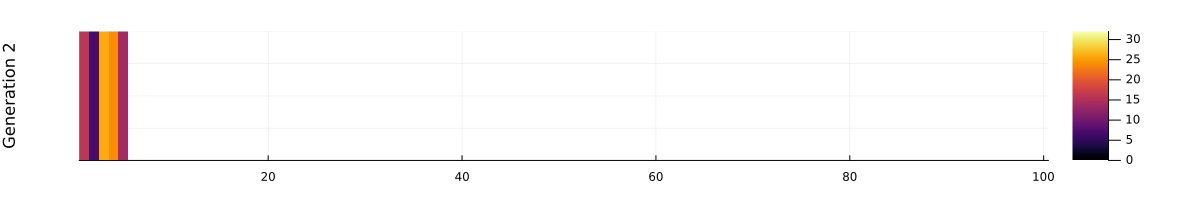

In [12]:
re_heatmap(test3["del"][:,:,1],1,20)

Let's also see the beneficial mutations:

┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_HufyHopoBS.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_HufyHopoBS.gif")
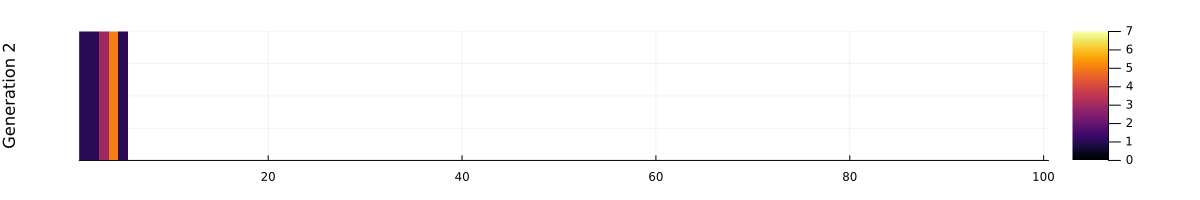

In [13]:
re_heatmap(test3["ben"][:,:,1],1,20)

Finally, here are some examples with a longer finite-sites expansion and a custom space size:

In [14]:
test = rangeexp_1d(30,200;x_max_burnin=5,x_max_exp=30,data_to_generate="FPSN")

Dict{String, Any} with 9 entries:
  "AAsel" => Float32[0.0 0.0 … 26.9412 26.2; 0.0 0.0 … 27.1667 27.25; … ; NaN N…
  "pops"  => Float32[23.0 26.0 … 23.0 29.0; 22.0 21.0 … 14.0 13.0; … ; NaN NaN …
  "aasel" => Float32[500.0 499.478 … 450.118 448.84; 500.0 499.619 … 448.278 44…
  "fitn"  => Float32[1.0 1.0 … 0.94752 0.94894; 1.0 1.0 … 0.947132 0.94701; … ;…
  "aaneu" => Float32[500.0 499.739 … 450.118 450.16; 500.0 499.667 … 448.444 44…
  "Aasel" => Float32[0.0 0.521739 … 22.9412 24.96; 0.0 0.380952 … 24.5556 24.41…
  "Aaneu" => Float32[0.0 0.26087 … 21.0 21.16; 0.0 0.333333 … 23.3333 21.4167; …
  "AAneu" => Float32[0.0 0.0 … 28.8824 28.68; 0.0 0.0 … 28.2222 29.6667; … ; Na…
  "stats" => Dict{String, Any}("capacity"=>20, "wlddim"=>1, "max_burnin"=>(5,),…

┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_DY7ujq9Q9C.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_DY7ujq9Q9C.gif")
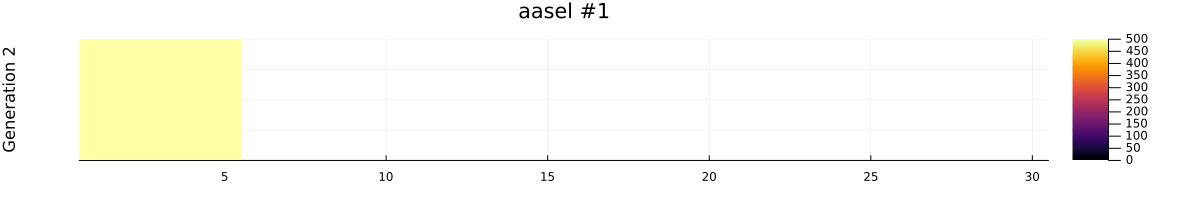

In [15]:
re_heatmap_aasel(test;n_gens_sub=0)

┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_rktuXoLWlW.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_rktuXoLWlW.gif")
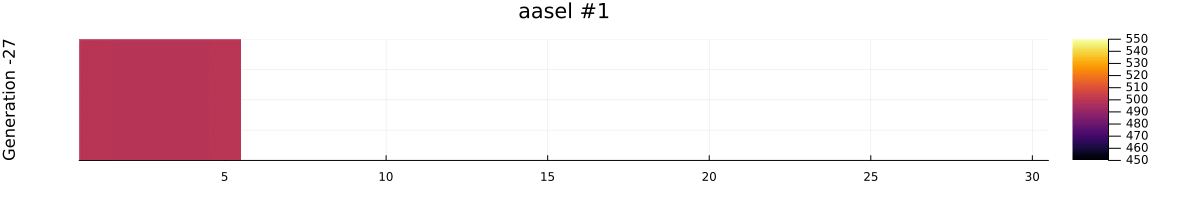

In [16]:
re_heatmap_aasel(test;clim=(450,550),slow_factor=0.5)

┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_N8ZSTipExk.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_N8ZSTipExk.gif")
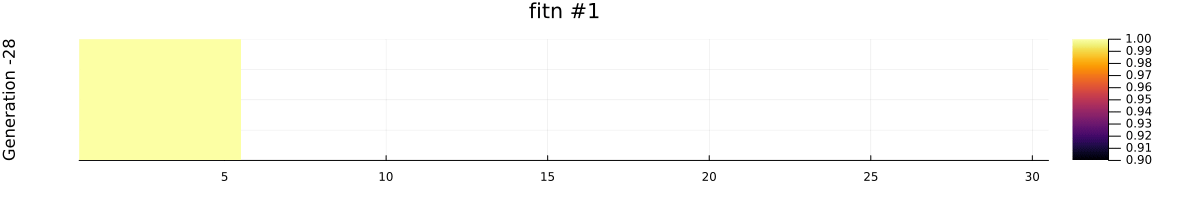

In [17]:
re_heatmap_fitn(test;clim=(0.9,1.0))

Let's use the `front_array` method to get the front array and visualise its evolution in time:

┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_PcJSR652ba.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_PcJSR652ba.gif")
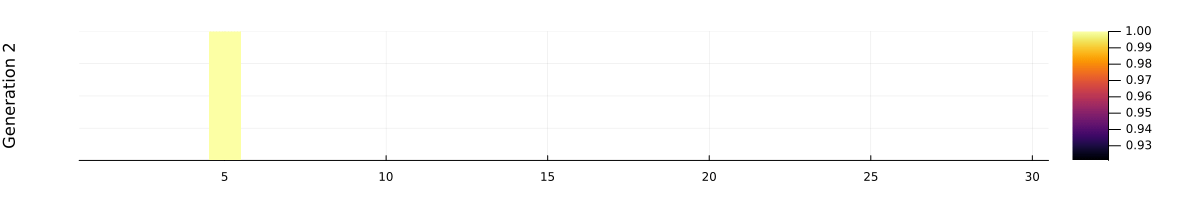

In [18]:
test_fitn_frontarr = front_array(test,"fitn";oneside=true)
re_heatmap(test_fitn_frontarr,1,100)

Now, `average_front` finds the average value of the front for every generation:

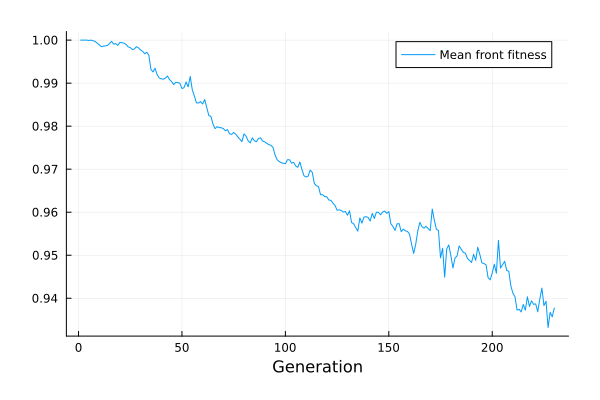

In [19]:
test_fitn_frontav = average_front(test,"fitn")
Plots.plot(test_fitn_frontav,xlabel="Generation",label="Mean front fitness")

And `average_all` finds the average value in the whole population for every generation:

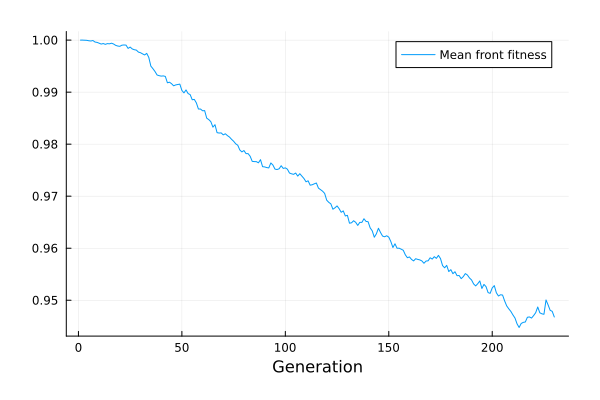

In [20]:
test_fitn_av = average_all(test,"fitn")
Plots.plot(test_fitn_av,xlabel="Generation",label="Mean front fitness")